In [2]:
import pandas as pd
import datetime

In [3]:
# Reading in data

crimes = pd.read_csv('Crimes.csv')
full_moon = pd.read_csv('full_moon.csv')
holidays = pd.read_csv('holidays.csv')
weather = pd.read_csv('weather.csv')

Here each date column is turned into a simple date time of the form Year/Month/Day to more easily join them together.

In [4]:
# Aligning date columns to allow for joining

weather['date'] = pd.to_datetime(weather['datetime'])
weather.drop(columns=['datetime'], inplace = True)

crimes['Date'] = pd.to_datetime(crimes.Date)
crimes['date'] = pd.to_datetime(pd.to_datetime(crimes['Date']).dt.date)
crimes['time'] = pd.to_datetime(crimes['Date']).dt.time
crimes['day_of_week'] = pd.to_datetime(crimes['date']).dt.day_of_week
crimes.drop(columns=['Date'], inplace=True)

full_moon['date'] = pd.to_datetime(full_moon.FullMoonDates)
full_moon.drop(columns=['FullMoonDates', 'Year'], inplace=True)
full_moon['full_moon'] = (pd.DataFrame({'full_moon': pd.Series(['full moon'] * len(full_moon))}))

holidays['date'] = pd.to_datetime(holidays.Date)
holidays.drop(columns = ['Date'], inplace=True)

In [5]:
# Merging dataframes

merged = pd.merge(crimes, weather, on='date', how='left')
merged = pd.merge(merged, full_moon, on='date', how = 'left')
merged = pd.merge(merged, holidays, on='date', how = 'left')


Below is a list of all of the possible factors from the datasets.

One thing we will want to consider - the prompt asks for us to limit our analysis to instances of violent crime, which some of the rows aren't. We could use the IUCR Illinois crime codes, the FBI codes or the descriptions to find a way to limit the rows.

In [7]:
df = merged[['date',
 'time',
 'day_of_week',
 # 'ID', 'Case Number',
 # 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 # 'Arrest',
 # 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 # 'X Coordinate',
 # 'Y Coordinate',
 # 'Year',
 # 'Updated On',
 # 'Latitude',
 # 'Longitude',
 'Location',
 # 'name',
 'tempmax',
 'tempmin',
 'temp',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'humidity',
 'precip',
 'precipprob',
 'precipcover',
 'preciptype',
 'snow',
 'snowdepth',
 'windgust',
 'windspeed',
 # 'winddir',
 # 'sealevelpressure',
 'cloudcover',
 'visibility',
 # 'solarradiation',
 # 'solarenergy',
 # 'uvindex',
 # 'severerisk',
 'sunrise',
 'sunset',
 'moonphase',
 'conditions',
 # 'description',
 # 'icon',
 # 'stations',
 'full_moon',
 'Holiday',
 # 'Day of Week'
 ]]

In [20]:
crime_count = pd.DataFrame(crimes['date'].value_counts().reset_index())

In [23]:
merged2 = pd.merge(crime_count, weather, on='date', how='left')
merged2 = pd.merge(merged2, full_moon, on='date', how = 'left')
merged2 = pd.merge(merged2, holidays, on='date', how = 'left')

In [29]:
merged2 = merged2[merged2['date'].dt.year > 2009]

In [36]:
merged2['day_of_week'] = pd.to_datetime(merged2['date']).dt.day_of_week
merged2['year'] = pd.to_datetime(merged2['date']).dt.year
merged2['month'] = pd.to_datetime(merged2['date']).dt.month
merged2.head()

,date,count,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,conditions,description,icon,stations,full_moon,Holiday,Day of Week,day_of_week,year,month
35,2020-05-31,136,"Chicago,United States",18.5,10.8,14.8,18.5,10.8,14.8,4.5,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,AN196,744665...",NaN,NaN,NaN,6,2020,5
148,2015-08-20,106,"Chicago,United States",23.6,15.9,19.4,23.6,15.9,19.4,10.7,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,NaN,NaN,3,2015,8
157,2012-01-01,105,"Chicago,United States",6.7,-1.1,2.5,3.9,-8.4,-3.3,-2.8,...,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,rain,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,New Year's Day,Sunday,6,2012,1
203,2016-01-28,101,"Chicago,United States",4.7,-0.9,1.6,-0.1,-6.9,-3.6,-3.7,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,NaN,NaN,3,2016,1
249,2012-03-29,98,"Chicago,United States",8.3,4.1,6.4,6.3,0.2,3.4,0.4,...,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"72534014819,KORD,KMDW,72530094846,74466504838,...",NaN,NaN,NaN,3,2012,3


In [12]:
df['Location Description'].value_counts()

Location Description
STREET                                             147309
SIDEWALK                                            95368
RESIDENCE                                           61446
APARTMENT                                           58919
ALLEY                                               17665
                                                    ...  
TRUCK                                                   1
ROOMING HOUSE                                           1
STAIRWELL                                               1
LIQUOR STORE                                            1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS         1
Name: count, Length: 157, dtype: int64

In [176]:
merged2['Year'].value_counts()

KeyError: 'Year'

In [13]:
df['Beat'].value_counts()

Beat
1112    53636
1121    43333
1122    43019
1132    40379
1133    40329
1113    35290
1111    34850
1135    34156
1134    33264
1123    31335
1131    28706
1115    28558
1124    27979
1114    20491
1125    16750
1532       40
1533       21
1331       10
1011        9
1312        5
2535        4
1311        3
1014        2
1531        2
1211        2
2514        1
1654        1
1524        1
1021        1
1215        1
2532        1
1022        1
2113        1
1225        1
1332        1
831         1
1023        1
1512        1
624         1
Name: count, dtype: int64

In [15]:
df['day_of_week'].value_counts()

day_of_week
4    76257
2    75971
3    75254
1    75106
5    72866
0    69990
6    66743
Name: count, dtype: int64

In [ ]:
pd.unique(df['FBI Code'])

array(['26', '07', '17', '01A', '18', '11', '08B', '04B', '08A', '24',
       '04A', '03', '14', '06', '05', '15', '02', '13', '20', '10', '09',
       '01B', '22', '16', '19', '12', '27'], dtype=object)

In [ ]:
df[df['FBI Code'] == '26'][['Primary Type', 'Description', 'FBI Code']]

,Primary Type,Description,FBI Code
0,OFFENSE INVOLVING CHILDREN,CHILD ABDUCTION,26
7,KIDNAPPING,UNLAWFUL RESTRAINT,26
63,OTHER OFFENSE,GUN OFFENDER - DUTY TO REGISTER,26
78,OTHER OFFENSE,VEHICLE TITLE / REGISTRATION OFFENSE,26
91,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,26
...,...,...,...
512098,CRIMINAL TRESPASS,TO RESIDENCE,26
512116,OTHER OFFENSE,VEHICLE TITLE / REGISTRATION OFFENSE,26
512144,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,26
512161,CRIMINAL TRESPASS,TO LAND,26


26 - Tresspassing, registration offense, harassment, order violation\
07 - Motor vehicle theft\
17 - Sexual Offense\
18 - Drug Violations\
11 - Fraud/Identity theft/Deception\
08B - Battery - Simple\
04B - Battery - Aggravated\
08A - Assault - Simple\
24 - Violation of Peace/Interfering with Officer\
14 - Criminal Damage\
06 - Theft\
05 - Burglary\
15 - Weapons Violation\
13 - Deceptive Practice (Buying or receiving stolen property)\
20 - Offense Involving Children (Abandonment or Endangering)\
10 - Forgery and Counterfeit\
09 - Arson\
22 - Liquor law violation\
16 - Prostitution\
19 - Gambling\
12 - Embezzlement\
27 - Sex Offense\
01B - Homicide


#### Violent Crimes
01A - First Degree Murder\
03 - Robbery\
04A - Assault - Aggravated\
02 - Criminal Sexual Assault

In [157]:
X = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
             'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
             'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
             'moonphase', 'day_of_week', 'year', 'month', 'preciptype', 'sunrise', 'sunset', 'conditions', 'full_moon', 'Holiday']]

num_features = merged2[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'humidity',
                        'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 
                        'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 
                        'moonphase', 'day_of_week', 'year', 'month']]

cat_features = merged2[['preciptype', 'conditions', 'full_moon', 'Holiday']]

cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

y = list(merged2['count'])

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.feature_selection import SelectPercentile, f_regression

In [158]:
numeric = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())])

categorical = Pipeline(steps=[('impute2', SimpleImputer(strategy='most_frequent')),
                     ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
                     ('percent', SelectPercentile(f_regression, percentile=60))
                     ])

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric, num_features),
        ("categorical", categorical, cat_features)
        ]
)
rfPipe = Pipeline([('preprocessor', preprocessor),
           ('model', RandomForestRegressor())])

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

rfPipe = rfPipe.fit(X_train, y_train)

In [162]:
y_pred = rfPipe.predict(X_test)  
mae = mean_absolute_error(y_test, y_pred) 

In [163]:
mae

6.939821981424148

In [144]:
rf_model = categorical.named_steps['model']

feature_importances = rf_model.feature_importances_

original_cat_feature_names = cat_features.columns

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': original_cat_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importance_df)

ValueError: All arrays must be of the same length

In [130]:
rf_model = numeric.named_steps['model']

feature_importances = rf_model.feature_importances_

original_numeric_feature_names = num_features.columns

feature_importance_df = pd.DataFrame({'Feature': original_numeric_feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

             Feature  Importance
24              year    0.408776
3       feelslikemax    0.042122
14           winddir    0.036727
23       day_of_week    0.036087
5          feelslike    0.035707
0            tempmax    0.035525
16        cloudcover    0.034605
22         moonphase    0.033265
15  sealevelpressure    0.032680
18    solarradiation    0.031669
13         windspeed    0.030047
6           humidity    0.028527
1            tempmin    0.027153
12          windgust    0.026652
4       feelslikemin    0.025114
25             month    0.024846
19       solarenergy    0.024322
2               temp    0.021389
7             precip    0.017689
17        visibility    0.017124
9        precipcover    0.010798
20           uvindex    0.008419
11         snowdepth    0.006475
10              snow    0.003007
8         precipprob    0.000954
21        severerisk    0.000322


In [170]:
import matplotlib.pyplot as plt

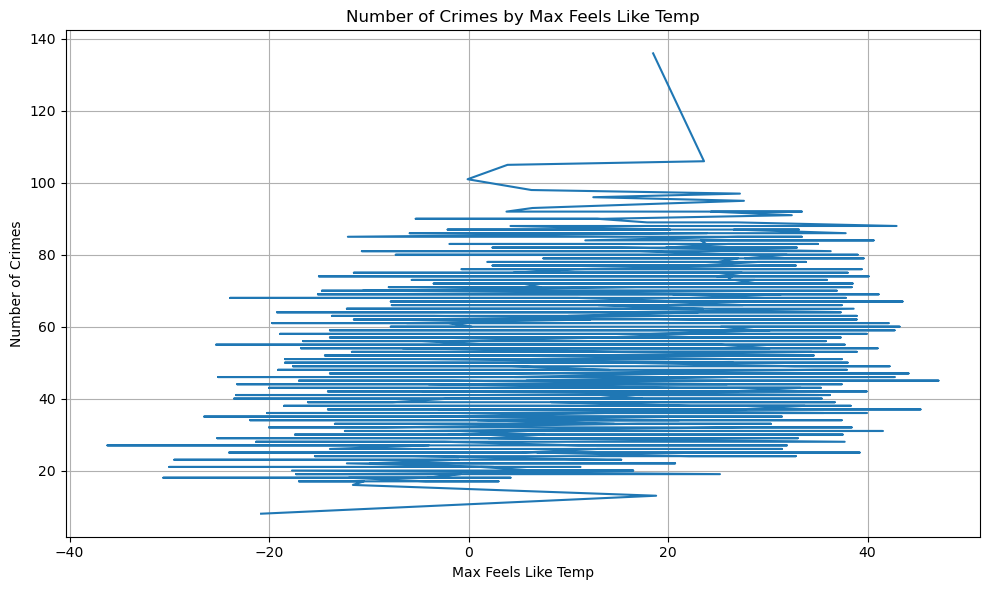

In [175]:
# Plot the timeline
plt.figure(figsize=(10, 6))
plt.plot(merged2['feelslikemax'], merged2['count'])
plt.title('Number of Crimes by Max Feels Like Temp')
plt.xlabel('Max Feels Like Temp')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.tight_layout()
plt.show()

